<a href="https://colab.research.google.com/github/andininur-pro/PEMROSESAN-BAHASA-ALAMI/blob/main/MODEL%20PREDIKSI%20HARGA%20PENUTUPAN%20NIKEL%20BERJANGKA%20(STUDI%20KASUS%20%3A%20LME%20DAN%20SHFE)_TAlagi_Andini_Nur_Izzati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# === 1. LOAD DATA ===

In [3]:
# === 1. LOAD DATA ===
# Membaca dua dataset
shfe_df = pd.read_csv('/content/drive/MyDrive/df.csv')
lme_df = pd.read_csv('/content/drive/MyDrive/df2.csv')

# Tampilkan data awal

In [4]:
# Tampilkan data awal
print("Data SHFE:")
print(shfe_df.head())
print("\nData LME:")
print(lme_df.head())

Data SHFE:
      Tanggal  Terakhir
0  2019-12-31    111.28
1  2020-01-01       NaN
2  2020-01-02    110.50
3  2020-01-03    109.25
4  2020-01-04       NaN

Data LME:
      Tanggal Terakhir
0  12/31/2019   14.025
1    1/1/2020      NaN
2    1/2/2020    14.26
3    1/3/2020   13.755
4    1/4/2020      NaN


# === 2. EKSPLORASI DATA ===

In [5]:
# === 2. EKSPLORASI DATA ===
# Informasi umum
print("\nInformasi Data SHFE:")
print(shfe_df.info())
print("\nInformasi Data LME:")
print(lme_df.info())



Informasi Data SHFE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tanggal   1828 non-null   object 
 1   Terakhir  1213 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB
None

Informasi Data LME:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   1828 non-null   object
 1   Terakhir  898 non-null    object
dtypes: object(2)
memory usage: 28.7+ KB
None


## Statistik deskriptif

In [6]:
shfe_df['Terakhir'] = pd.to_numeric(shfe_df['Terakhir'], errors='coerce')
shfe_df['Tanggal'] = pd.to_datetime(shfe_df['Tanggal'], errors='coerce')

In [7]:
lme_df['Tanggal'] = pd.to_datetime(lme_df['Tanggal'], errors='coerce')
lme_df['Terakhir'] = pd.to_numeric(lme_df['Terakhir'], errors='coerce')

In [8]:
# Statistik deskriptif
print("\nStatistik Deskriptif Data SHFE:")
print(shfe_df.describe())


print("\nStatistik Deskriptif Data LME:")
print(lme_df.describe())


Statistik Deskriptif Data SHFE:
                   Tanggal     Terakhir
count                 1828  1213.000000
mean   2022-07-01 12:00:00   148.774617
min    2019-12-31 00:00:00    91.150000
25%    2021-03-31 18:00:00   125.140000
50%    2022-07-01 12:00:00   139.210000
75%    2023-10-01 06:00:00   172.150000
max    2024-12-31 00:00:00   263.290000
std                    NaN    34.666754

Statistik Deskriptif Data LME:
                   Tanggal    Terakhir
count                 1828  376.000000
mean   2022-07-01 12:00:00   15.377407
min    2019-12-31 00:00:00   10.880000
25%    2021-03-31 18:00:00   12.881500
50%    2022-07-01 12:00:00   15.094500
75%    2023-10-01 06:00:00   16.175250
max    2024-12-31 00:00:00   32.594000
std                    NaN    3.365092


##Visualisasi distribusi harga penutupan

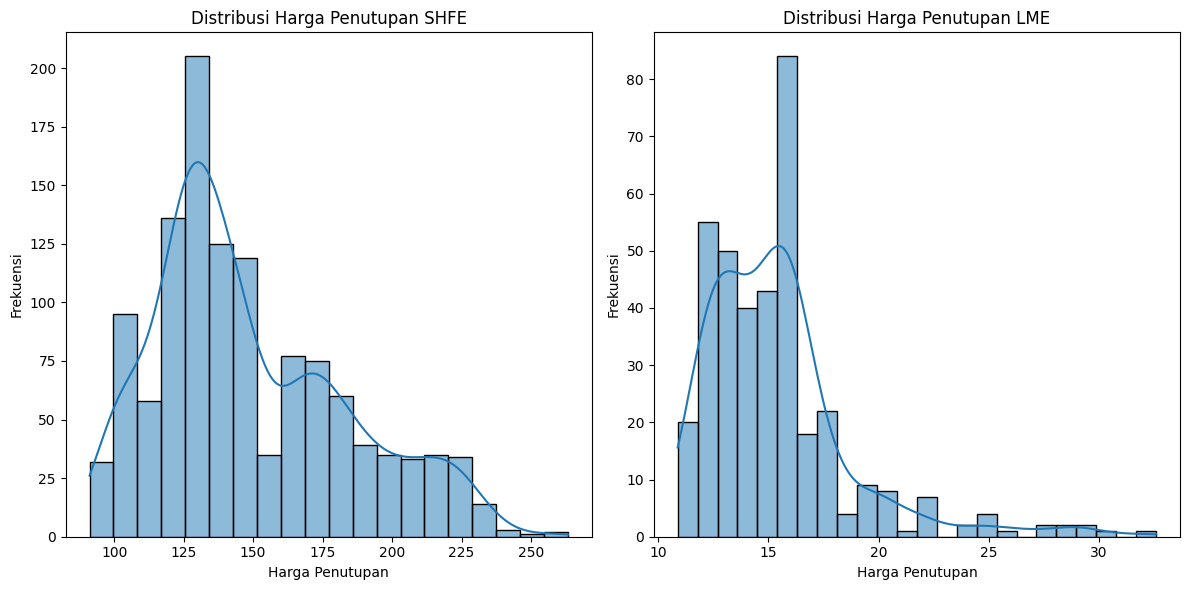

In [9]:
# Visualisasi distribusi harga penutupan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(shfe_df['Terakhir'], kde=True)
plt.title('Distribusi Harga Penutupan SHFE')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(lme_df['Terakhir'], kde=True)
plt.title('Distribusi Harga Penutupan LME')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


## Plot tren harga dari waktu ke waktu, pisahkan kedua data

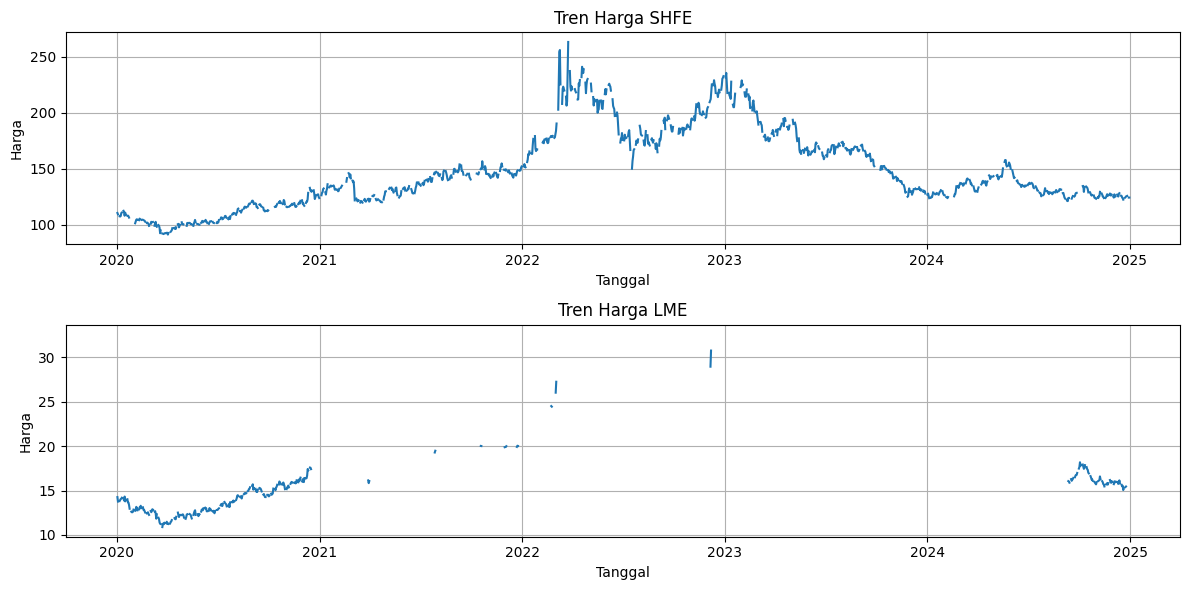

In [10]:
# Plot tren harga dari waktu ke waktu, pisahkan kedua data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(shfe_df['Tanggal'], shfe_df['Terakhir'])
plt.title('Tren Harga SHFE')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lme_df['Tanggal'], lme_df['Terakhir'])
plt.title('Tren Harga LME')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.grid(True)

plt.tight_layout()
plt.show()


## Deteksi outlier menggunakan boxplot

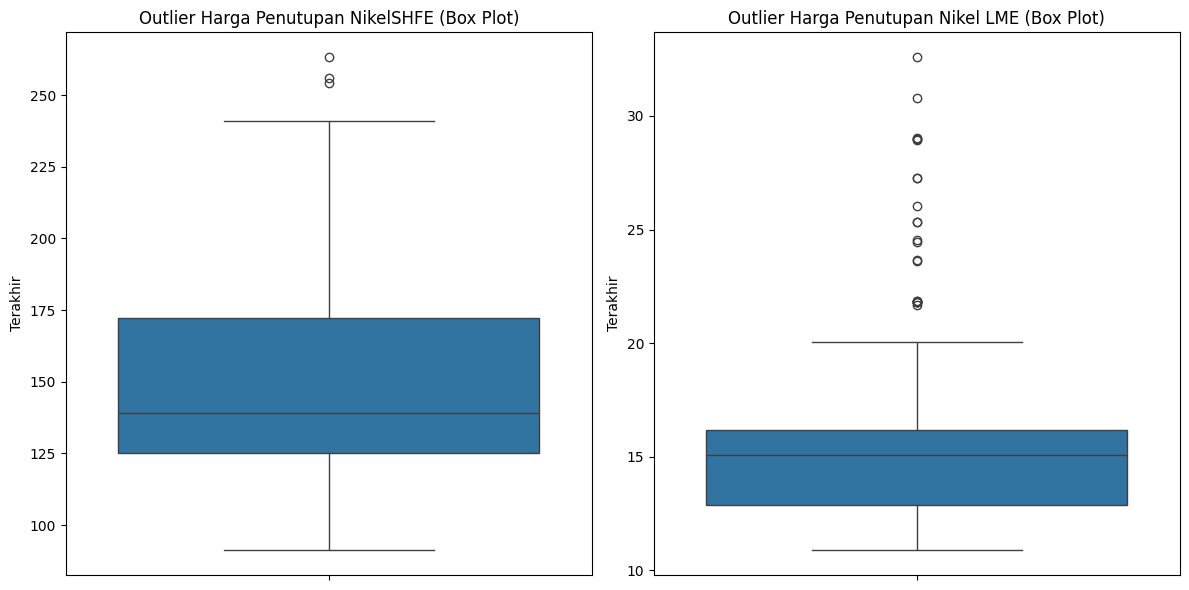

In [12]:
# Deteksi outlier menggunakan boxplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=shfe_df['Terakhir'])
plt.title('Outlier Harga Penutupan NikelSHFE (Box Plot)')

plt.subplot(1, 2, 2)
sns.boxplot(y=lme_df['Terakhir'])
plt.title('Outlier Harga Penutupan Nikel LME (Box Plot)')

plt.tight_layout()
plt.show()


# === 3. DATA PREPROCESSING ===

## Konversi kolom tanggal

In [13]:
# Konversi kolom tanggal
shfe_df['Tanggal'] = pd.to_datetime(shfe_df['Tanggal'])
lme_df['Tanggal'] = pd.to_datetime(lme_df['Tanggal'])

## Set kolom tanggal sebagai index

In [14]:
# Set kolom tanggal sebagai index
shfe_df.set_index('Tanggal', inplace=True)
lme_df.set_index('Tanggal', inplace=True)

Bagian Tanggal digunakan untuk mengonversi data tanggal dari bentuk string menjadi format datetime agar bisa digunakan untuk analisis time series.

📅 Kenapa penting?

* Datetime indexing: Memungkinkan penggunaan fungsi berbasis waktu seperti pengelompokan mingguan, bulanan, dll.
* Plotting tren: Memastikan sumbu-x dalam plot waktu benar-benar merepresentasikan urutan tanggal, bukan hanya teks biasa.
* Sorting: Membantu mengurutkan data berdasarkan waktu untuk analisis prediksi.

Ini membuat setiap baris diidentifikasi berdasarkan tanggal, penting untuk model GRU karena time series data harus memiliki urutan waktu yang jelas.

## Imputasi manual dengan interpolasi linear (tanpa library)


In [15]:
# Imputasi manual dengan interpolasi linear (tanpa library)
def linear_interpolation(data):
    for i in range(1, len(data) - 1):
        if pd.isnull(data[i]):
            prev_val = data[i - 1]
            next_idx = i + 1
            while next_idx < len(data) and pd.isnull(data[next_idx]):
                next_idx += 1
            next_val = data[next_idx] if next_idx < len(data) else prev_val
            data[i] = prev_val + (next_val - prev_val) / (next_idx - i + 1)
    return data

shfe_df['Terakhir'] = linear_interpolation(shfe_df['Terakhir'].values)
lme_df['Terakhir'] = linear_interpolation(lme_df['Terakhir'].values)


### statistik data setelah imputasi


Statistik Deskriptif Data SHFE setelah Imputasi:
          Terakhir
count  1828.000000
mean    148.841428
std      34.854946
min      91.150000
25%     125.033750
50%     139.820000
75%     171.992500
max     263.290000

Statistik Deskriptif Data LME setelah Imputasi:
          Terakhir
count  1827.000000
mean     19.311284
std       4.698082
min      10.880000
25%      16.336978
50%      18.342000
75%      21.815118
max      32.594000


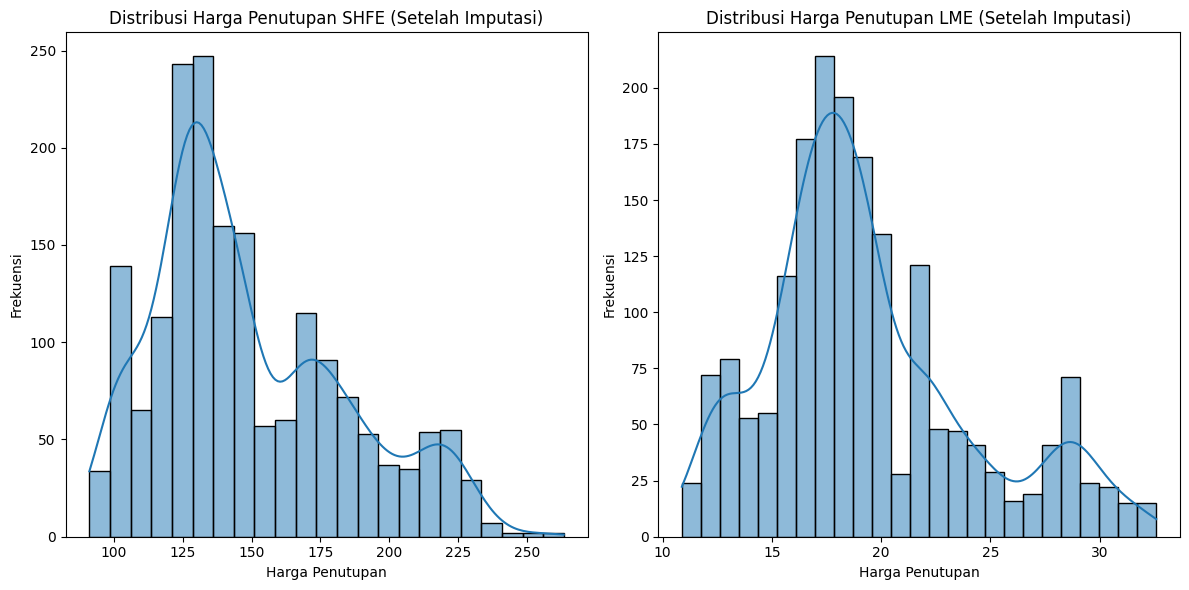

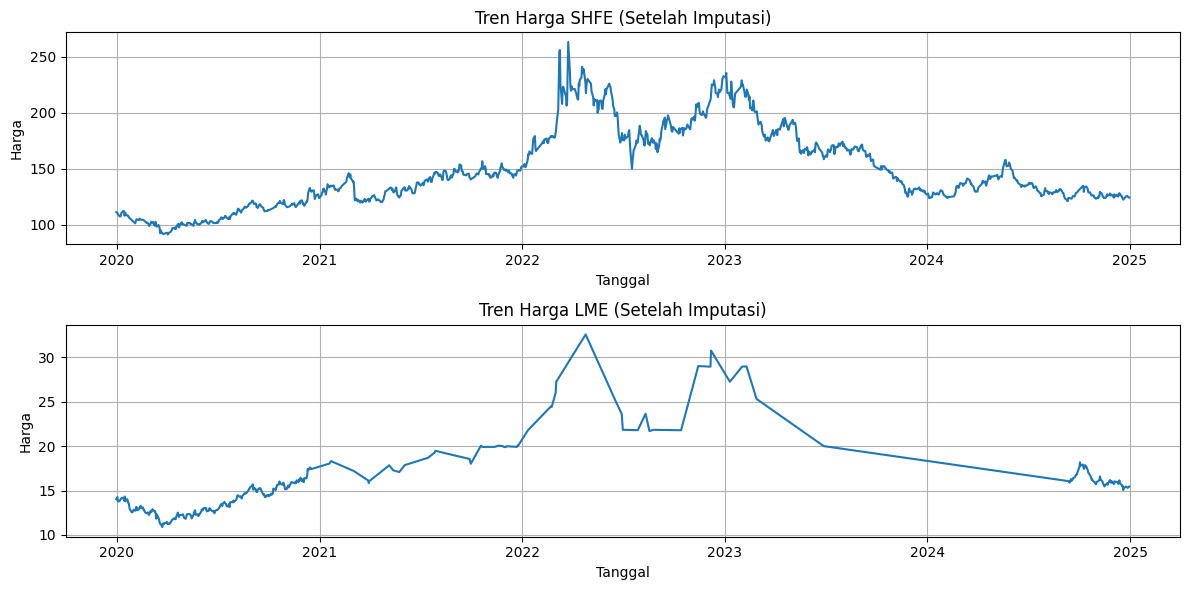

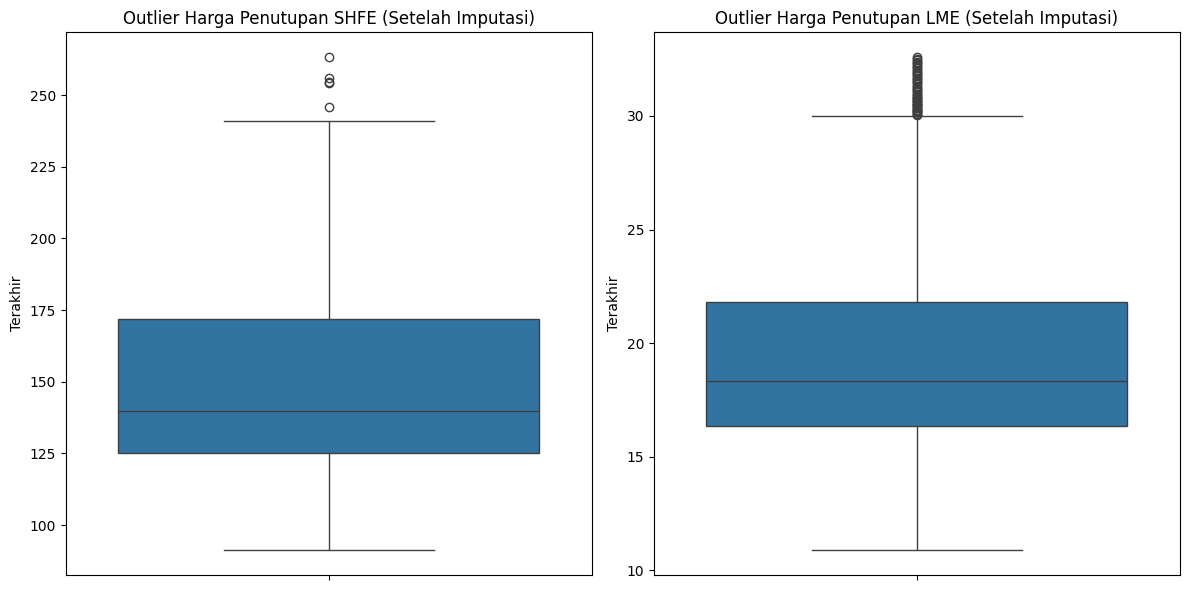

In [16]:
# Statistik deskriptif setelah imputasi
print("\nStatistik Deskriptif Data SHFE setelah Imputasi:")
print(shfe_df.describe())

print("\nStatistik Deskriptif Data LME setelah Imputasi:")
print(lme_df.describe())

# Visualisasi distribusi harga penutupan setelah imputasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(shfe_df['Terakhir'], kde=True)
plt.title('Distribusi Harga Penutupan SHFE (Setelah Imputasi)')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(lme_df['Terakhir'], kde=True)
plt.title('Distribusi Harga Penutupan LME (Setelah Imputasi)')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Plot tren harga setelah imputasi
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(shfe_df.index, shfe_df['Terakhir'])
plt.title('Tren Harga SHFE (Setelah Imputasi)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lme_df.index, lme_df['Terakhir'])
plt.title('Tren Harga LME (Setelah Imputasi)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.grid(True)

plt.tight_layout()
plt.show()

# Deteksi outlier setelah imputasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=shfe_df['Terakhir'])
plt.title('Outlier Harga Penutupan SHFE (Setelah Imputasi)')

plt.subplot(1, 2, 2)
sns.boxplot(y=lme_df['Terakhir'])
plt.title('Outlier Harga Penutupan LME (Setelah Imputasi)')

plt.tight_layout()
plt.show()


###info kedua data

In [17]:
# Informasi umum setelah preprocessing
print("\nInformasi Data SHFE setelah preprocessing:")
print(shfe_df.info())
print("\nInformasi Data LME setelah preprocessing:")
print(lme_df.info())



Informasi Data SHFE setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Terakhir  1828 non-null   float64
dtypes: float64(1)
memory usage: 28.6 KB
None

Informasi Data LME setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-12-31 to 2024-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Terakhir  1827 non-null   float64
dtypes: float64(1)
memory usage: 28.6 KB
None


##Normalisasi menggunakan MinMaxScaler

In [18]:
# Normalisasi menggunakan MinMaxScaler
scaler_shfe = MinMaxScaler()
scaler_lme = MinMaxScaler()

shfe_df['Terakhir'] = scaler_shfe.fit_transform(shfe_df[['Terakhir']])
lme_df['Terakhir'] = scaler_lme.fit_transform(lme_df[['Terakhir']])

## Tampilkan data setelah preprocessing

In [19]:
# Tampilkan data setelah preprocessing
print("\nSHFE setelah imputasi dan normalisasi:")
print(shfe_df.head())
print("\nLME setelah imputasi dan normalisasi:")
print(lme_df.head())


SHFE setelah imputasi dan normalisasi:
            Terakhir
Tanggal             
2019-12-31  0.116940
2020-01-01  0.114674
2020-01-02  0.112409
2020-01-03  0.105147
2020-01-04  0.101700

LME setelah imputasi dan normalisasi:
            Terakhir
Tanggal             
2019-12-31  0.144837
2020-01-01  0.150249
2020-01-02  0.155660
2020-01-03  0.132403
2020-01-04  0.133401



Outliers SHFE (sebelum imputasi):
Tanggal
2022-03-09    0.948124
2022-03-10    0.958174
2022-03-25    1.000000
2022-03-26    0.949711
2022-03-27    0.899423
Name: Terakhir, dtype: float64

Jumlah Outliers SHFE (sebelum imputasi): 5

Outliers SHFE (setelah imputasi):
Tanggal
2022-03-09    0.948124
2022-03-10    0.958174
2022-03-25    1.000000
2022-03-26    0.949711
2022-03-27    0.899423
Name: Terakhir, dtype: float64

Jumlah Outliers SHFE (setelah imputasi): 5

Outliers LME (sebelum imputasi):
Tanggal
2022-03-31    0.884193
2022-04-01    0.888826
2022-04-02    0.893458
2022-04-03    0.898090
2022-04-04    0.902723
2022-04-05    0.907355
2022-04-06    0.911987
2022-04-07    0.916619
2022-04-08    0.921252
2022-04-09    0.925884
2022-04-10    0.930516
2022-04-11    0.935148
2022-04-12    0.939781
2022-04-13    0.944413
2022-04-14    0.949045
2022-04-15    0.953677
2022-04-16    0.958310
2022-04-17    0.962942
2022-04-18    0.967574
2022-04-19    0.972206
2022-04-20    0.976839
2022-04-2

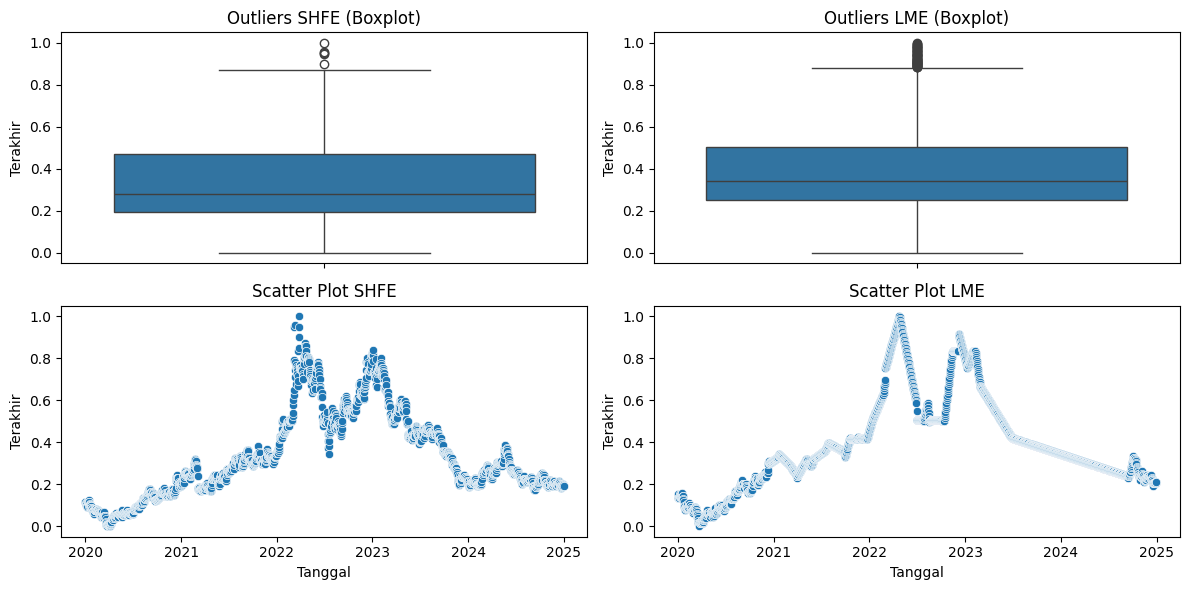

In [20]:
# prompt: statistik, distribusi,outlier dan visualisasi data, pake bahasa indonesia

# Statistik deskriptif sebelum dan sesudah imputasi sudah ditampilkan di kode sebelumnya.
# Berikut adalah penambahan analisis outlier dan visualisasi lebih lanjut.

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Deteksi outlier pada data SHFE sebelum dan sesudah imputasi
outliers_shfe_before = detect_outliers_iqr(shfe_df['Terakhir'])
outliers_shfe_after = detect_outliers_iqr(shfe_df['Terakhir'])


# Deteksi outlier pada data LME sebelum dan sesudah imputasi
outliers_lme_before = detect_outliers_iqr(lme_df['Terakhir']) # Menggunakan data sebelum imputasi
outliers_lme_after = detect_outliers_iqr(lme_df['Terakhir']) # Menggunakan data setelah imputasi

print("\nOutliers SHFE (sebelum imputasi):")
print(outliers_shfe_before)
print("\nJumlah Outliers SHFE (sebelum imputasi):", len(outliers_shfe_before))

print("\nOutliers SHFE (setelah imputasi):")
print(outliers_shfe_after)
print("\nJumlah Outliers SHFE (setelah imputasi):", len(outliers_shfe_after))

print("\nOutliers LME (sebelum imputasi):")
print(outliers_lme_before)
print("\nJumlah Outliers LME (sebelum imputasi):", len(outliers_lme_before))

print("\nOutliers LME (setelah imputasi):")
print(outliers_lme_after)
print("\nJumlah Outliers LME (setelah imputasi):", len(outliers_lme_after))

# Visualisasi outlier
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(y=shfe_df['Terakhir'])
plt.title('Outliers SHFE (Boxplot)')

plt.subplot(2, 2, 2)
sns.boxplot(y=lme_df['Terakhir'])
plt.title('Outliers LME (Boxplot)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=shfe_df.index, y=shfe_df['Terakhir'])
plt.title('Scatter Plot SHFE')


plt.subplot(2, 2, 4)
sns.scatterplot(x=lme_df.index, y=lme_df['Terakhir'])
plt.title('Scatter Plot LME')

plt.tight_layout()
plt.show()


**Alasan untuk *tidak* menghapus outlier:**

* **Informasi berharga:** Outlier mungkin merepresentasikan kejadian langka tetapi penting yang dapat memberikan wawasan yang berharga. Menghapus outlier dapat menyebabkan kehilangan informasi penting ini. Contohnya, outlier bisa menunjukkan perubahan fundamental tren pasar atau anomali yang penting untuk diprediksi.
* **Sifat data:**  Dalam beberapa kasus, outlier merupakan bagian alami dari data. Jika outlier adalah fenomena yang sah, menghapusnya dapat merusak model.
* **Perlu penanganan khusus:** Alih-alih menghapus, Anda bisa menangani outlier dengan metode lain seperti transformasi data (misalnya, log transformasi) atau menggunakan model yang lebih robust terhadap outlier.



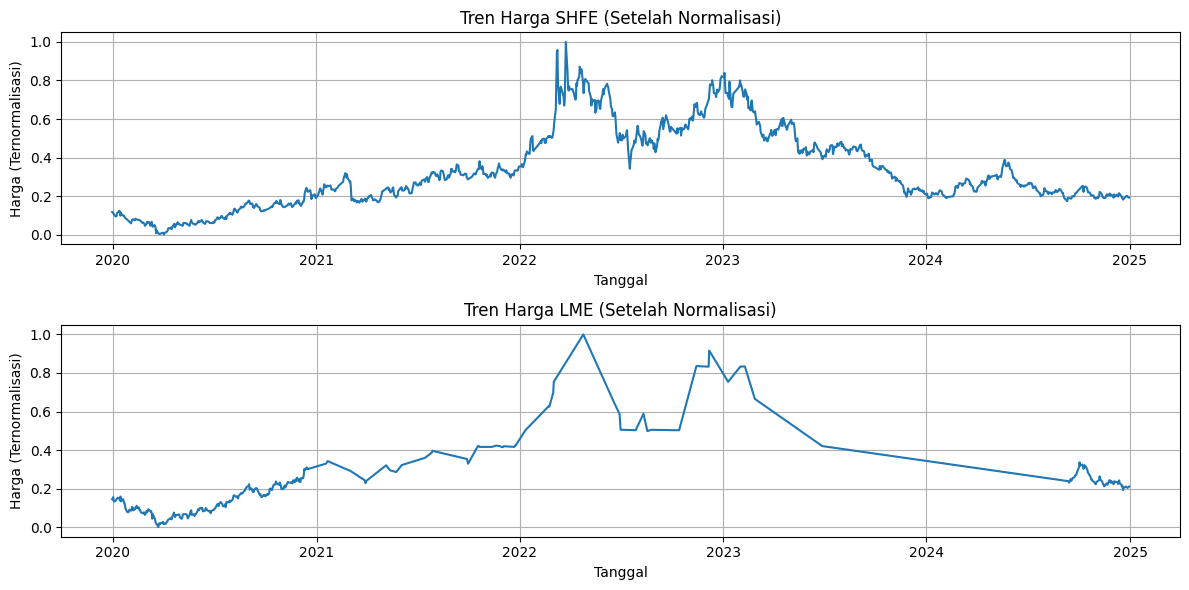

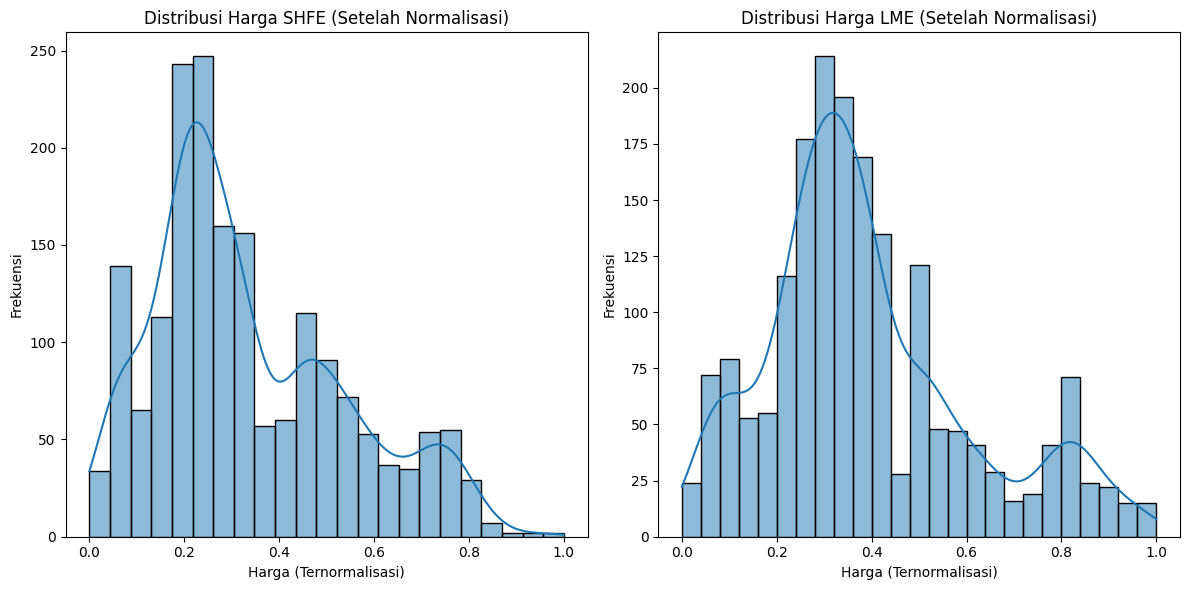

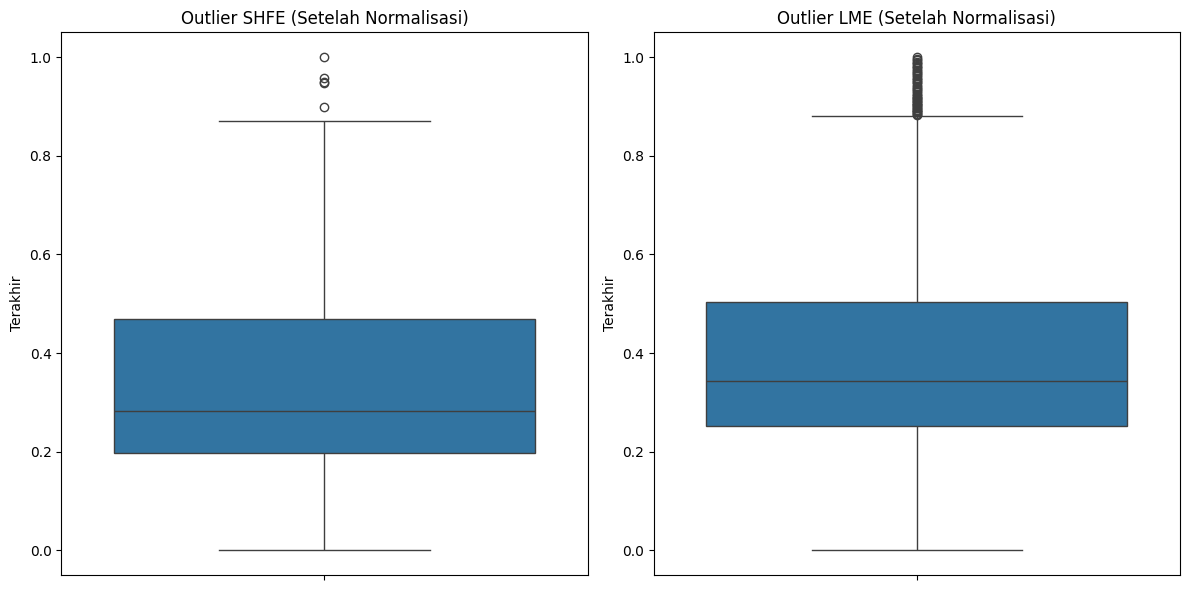

In [21]:
# Visualisasi data setelah normalisasi
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(shfe_df.index, shfe_df['Terakhir'])
plt.title('Tren Harga SHFE (Setelah Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Ternormalisasi)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lme_df.index, lme_df['Terakhir'])
plt.title('Tren Harga LME (Setelah Normalisasi)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Ternormalisasi)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Histogram setelah normalisasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(shfe_df['Terakhir'], kde=True)
plt.title('Distribusi Harga SHFE (Setelah Normalisasi)')
plt.xlabel('Harga (Ternormalisasi)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(lme_df['Terakhir'], kde=True)
plt.title('Distribusi Harga LME (Setelah Normalisasi)')
plt.xlabel('Harga (Ternormalisasi)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Boxplot setelah normalisasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=shfe_df['Terakhir'])
plt.title('Outlier SHFE (Setelah Normalisasi)')

plt.subplot(1, 2, 2)
sns.boxplot(y=lme_df['Terakhir'])
plt.title('Outlier LME (Setelah Normalisasi)')

plt.tight_layout()
plt.show()


# === 4. SEQUENCE DATA ===

In [22]:
# === 4. SEQUENCE DATA ===
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10

shfe_values = shfe_df['Terakhir'].values
lme_values = lme_df['Terakhir'].values

X_shfe, y_shfe = create_sequences(shfe_values, seq_length)
X_lme, y_lme = create_sequences(lme_values, seq_length)

Bagian SEQUENCE DATA ini bertujuan untuk mengubah data deret waktu (time series) menjadi format yang bisa digunakan oleh model GRU.

📈 Penjelasan kodenya:

```
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
 ```
✨ Apa yang dilakukan:

* Input:
 * `data` : Data harga penutupan nikel (SHFE/LME) dalam bentuk array.
* `seq_length`: Panjang window untuk setiap urutan (misalnya 10 hari sebelumnya).

* Proses:
* `X (features)`: Mengambil potongan (window) sepanjang seq_length.
* `y (target)`: Mengambil nilai setelah seq_length untuk diprediksi.

* Output:
* `X` : Array berdimensi (jumlah sampel, seq_length) untuk input model.
*`y`: Target yang cocok dengan data setelah setiap window.

Contohnya, jika data = [100, 101, 102, ..., 110] dan seq_length = 3:

X:

[100, 101, 102]

[101, 102, 103]
…


y:

103

104
…

👉 Ini penting agar model bisa belajar hubungan antar nilai dalam satu rentang waktu untuk memprediksi nilai berikutnya.

In [28]:
X_lme

array([[0.14483743, 0.15024869, 0.15565994, ..., 0.14069264, 0.14598876,
        0.14760063],
       [0.15024869, 0.15565994, 0.13240306, ..., 0.14598876, 0.14760063,
        0.15243622],
       [0.15565994, 0.13240306, 0.13340088, ..., 0.14760063, 0.15243622,
        0.15097786],
       ...,
       [0.19218016, 0.20364742, 0.20502901, ..., 0.20584262, 0.20341715,
        0.20576587],
       [0.20364742, 0.20502901, 0.20641061, ..., 0.20341715, 0.20576587,
        0.20811458],
       [0.20502901, 0.20641061, 0.20779221, ..., 0.20576587, 0.20811458,
        0.2104633 ]])

In [30]:
X_shfe

array([[0.1169397 , 0.1146741 , 0.1124085 , ..., 0.09381898, 0.09678169,
        0.11200186],
       [0.1146741 , 0.1124085 , 0.10514697, ..., 0.09678169, 0.11200186,
        0.11444173],
       [0.1124085 , 0.10514697, 0.10170017, ..., 0.11200186, 0.11444173,
        0.11746253],
       ...,
       [0.18856745, 0.1814221 , 0.18463654, ..., 0.19954688, 0.20094109,
        0.19797839],
       [0.1814221 , 0.18463654, 0.18785097, ..., 0.20094109, 0.19797839,
        0.19501568],
       [0.18463654, 0.18785097, 0.19106541, ..., 0.19797839, 0.19501568,
        0.19205298]])

# === 5. SPLIT DATA (TRAIN, VALIDATION, TEST) ===


In [31]:
# === 5. SPLIT DATA (TRAIN, VALIDATION, TEST) ===
def split_data(X, y):
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))

    X_train = X[:train_size]
    y_train = y[:train_size]

    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]

    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train_shfe, y_train_shfe, X_val_shfe, y_val_shfe, X_test_shfe, y_test_shfe = split_data(X_shfe, y_shfe)
X_train_lme, y_train_lme, X_val_lme, y_val_lme, X_test_lme, y_test_lme = split_data(X_lme, y_lme)

print("Data SHFE:")
print(f"Train: {len(X_train_shfe)}, Val: {len(X_val_shfe)}, Test: {len(X_test_shfe)}")
print("Data LME:")
print(f"Train: {len(X_train_lme)}, Val: {len(X_val_lme)}, Test: {len(X_test_lme)}")


Data SHFE:
Train: 1272, Val: 272, Test: 274
Data LME:
Train: 1272, Val: 272, Test: 274


# === 6. BUILD GRU MODEL ===

In [32]:
def build_gru(units=50, learning_rate=0.001, dropout=0.2):
    model = Sequential([
        GRU(units, input_shape=(seq_length, 1)),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

##Spesifikasi model inisiasi awal

In [33]:
#Spesifikasi model inisiasi awal
model = build_gru()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

# === 7. GRID SEARCH MANUAL ===

## inisiasi parameter gru shfe

In [34]:
import pandas as pd
import time

# Variasi hyperparameter sederhana (dibuat sedikit agar cepat)
units_options = [50, 100]
learning_rates = [0.001, 0.01]
batch_sizes = [16]
epochs_options = [50]

# Inisialisasi hasil terbaik
best_mse = float('inf')
best_params = {}
results = []  # Untuk menyimpan hasil evaluasi

print("Memulai Grid Search (estimasi waktu: < 1 menit)...")

# Mulai hitung waktu
start_time = time.time()

# Grid Search manual
for units in units_options:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                # Bangun model GRU
                model = build_gru(units=units, learning_rate=lr)

                # Latih model (verbose=0 agar output ringkas)
                history = model.fit(
                    X_train_shfe, y_train_shfe,
                    validation_data=(X_val_shfe, y_val_shfe),
                    epochs=epochs, batch_size=batch_size, verbose=0
                )

                # Evaluasi model
                mse = model.evaluate(X_val_shfe, y_val_shfe, verbose=0)

                # Simpan hasil evaluasi
                results.append([units, lr, batch_size, epochs, mse])

                # Tampilkan hasil kombinasi dan MSE
                print(f"Units: {units}, LR: {lr}, Batch Size: {batch_size}, Epochs: {epochs} -> MSE: {mse:.4f}")

                # Simpan hyperparameter terbaik
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'units': units, 'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}

    # Cek waktu, hentikan jika lebih dari 1 menit
    if time.time() - start_time > 60:
        print("\nWaktu komputasi mencapai 1 menit, menghentikan proses...")
        break

# Konversi hasil ke tabel pandas
results_df = pd.DataFrame(results, columns=['Units', 'Learning Rate', 'Batch Size', 'Epochs', 'MSE'])
print("\nHasil Grid Search:")
print(results_df)

# Menampilkan hyperparameter terbaik
print("\nBest Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Memulai Grid Search (estimasi waktu: < 1 menit)...
Units: 50, LR: 0.001, Batch Size: 16, Epochs: 50 -> MSE: 0.0001
Units: 50, LR: 0.01, Batch Size: 16, Epochs: 50 -> MSE: 0.0001
Units: 100, LR: 0.001, Batch Size: 16, Epochs: 50 -> MSE: 0.0001
Units: 100, LR: 0.01, Batch Size: 16, Epochs: 50 -> MSE: 0.0001

Waktu komputasi mencapai 1 menit, menghentikan proses...

Hasil Grid Search:
   Units  Learning Rate  Batch Size  Epochs       MSE
0     50          0.001          16      50  0.000075
1     50          0.010          16      50  0.000108
2    100          0.001          16      50  0.000132
3    100          0.010          16      50  0.000079

Best Hyperparameters: {'units': 50, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 50}
Best MSE: 7.513640593970194e-05


## ini

In [25]:
# === 7. GRID SEARCH MANUAL ===
# Hyperparameter sederhana dengan 2 variasi
units_options = [50, 100]
learning_rates = [0.001, 0.01]
batch_sizes = [16, 32]
epochs_options = [50, 100]

# Inisialisasi hasil terbaik
best_mse = float('inf')
best_params = {}

print("Memulai Grid Search...")

# Grid Search manual (uji coba 2 variasi)
for units in units_options:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                # Bangun model GRU
                model = build_gru(units=units, learning_rate=lr)

                # Latih model (verbose=1 untuk melihat proses training)
                history = model.fit(
                    X_train_shfe, y_train_shfe,
                    validation_data=(X_val_shfe, y_val_shfe),
                    epochs=epochs, batch_size=batch_size, verbose=1
                )

                # Evaluasi model
                mse = model.evaluate(X_val_shfe, y_val_shfe, verbose=0)

                # Menampilkan hasil evaluasi
                print(f"Units: {units}, LR: {lr}, Batch Size: {batch_size}, Epochs: {epochs} -> MSE: {mse:.4f}")

                # Menyimpan hasil terbaik
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'units': units, 'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}

# Hasil terbaik
print("\nHasil terbaik:")
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Memulai Grid Search...
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0724 - val_loss: 2.6121e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 1.9154e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 1.8630e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 1.6542e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 2.8462e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 1.7977e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 1.6142e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 1.5081e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 1.4700e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 2.5960e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - val_loss: 1.4328e-04
Epoch 1

KeyboardInterrupt: 

In [ ]:
# prompt: tampilkan nilai mse untuk setiap kombinasi yang digunakan grid search

units_options = [50, 100, 150]
learning_rates = [0.001, 0.01]
batch_sizes = [16, 32]
epochs_options = [50, 100]

for units in units_options:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                model = build_gru(units=units, learning_rate=lr)
                history = model.fit(X_train_shfe, y_train_shfe,
                                    validation_data=(X_val_shfe, y_val_shfe),
                                    epochs=epochs, batch_size=batch_size, verbose=0)
                mse = model.evaluate(X_val_shfe, y_val_shfe, verbose=0)
                print(f"Units: {units}, Learning Rate: {lr}, Batch Size: {batch_size}, Epochs: {epochs}, MSE: {mse}")


## train best model (1 output) shfe

In [36]:
# ===  TRAIN FINAL MODEL ===
# Ambil hyperparameter untuk membangun model
best_model = build_gru(units=best_params['units'], learning_rate=best_params['learning_rate'])

# Latih model menggunakan batch_size dan epochs
best_model.fit(
    X_train_shfe, y_train_shfe,
    validation_data=(X_val_shfe, y_val_shfe),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0925 - val_loss: 2.7090e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 3.9446e-04
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - val_loss: 2.1867e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 1.7282e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 1.9133e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 1.6106e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 3.0528e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0020 - val_loss: 1.7889e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 2.1776e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 3.8712e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 2.0822e-04
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s

## prediksi shfe (menggunakan data uji)


In [91]:
# === 8. PREDICTION ===
y_pred = best_model.predict(X_test_shfe)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## denormalisasi

In [92]:
# Inverse scaling hasil prediksi
y_test_inv = scaler_shfe.inverse_transform(y_test_shfe.reshape(-1, 1))
y_pred_inv = scaler_shfe.inverse_transform(y_pred)

##Evaluasi Model Prediksi (Data test vs Data Aktual)

In [93]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.8389886730457057


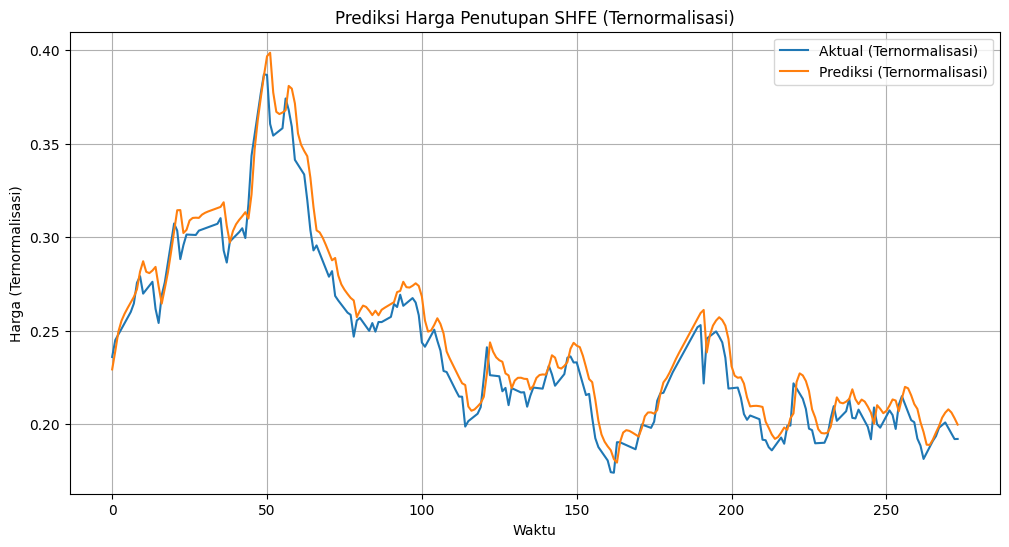

In [44]:
# Visualisasi data prediksi SEBELUM denormalisasi
plt.figure(figsize=(12, 6))
plt.plot(y_test_shfe, label='Aktual (Ternormalisasi)')
plt.plot(y_pred, label='Prediksi (Ternormalisasi)')
plt.title('Prediksi Harga Penutupan SHFE (Ternormalisasi)')
plt.xlabel('Waktu')
plt.ylabel('Harga (Ternormalisasi)')
plt.legend()
plt.grid(True)
plt.show()


##visualisasi setelah denoralisasi shfe

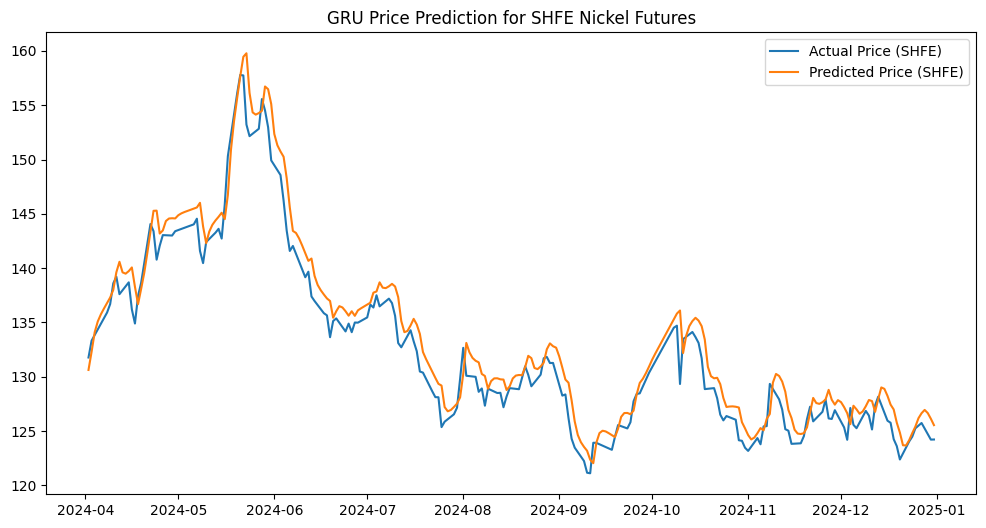

In [42]:
# === 10. VISUALISASI ===
plt.figure(figsize=(12, 6))
plt.plot(shfe_df.index[-len(y_test_shfe):], y_test_inv, label='Actual Price (SHFE)')
plt.plot(shfe_df.index[-len(y_test_shfe):], y_pred_inv, label='Predicted Price (SHFE)')
plt.title('GRU Price Prediction for SHFE Nickel Futures')
plt.legend()
plt.show()

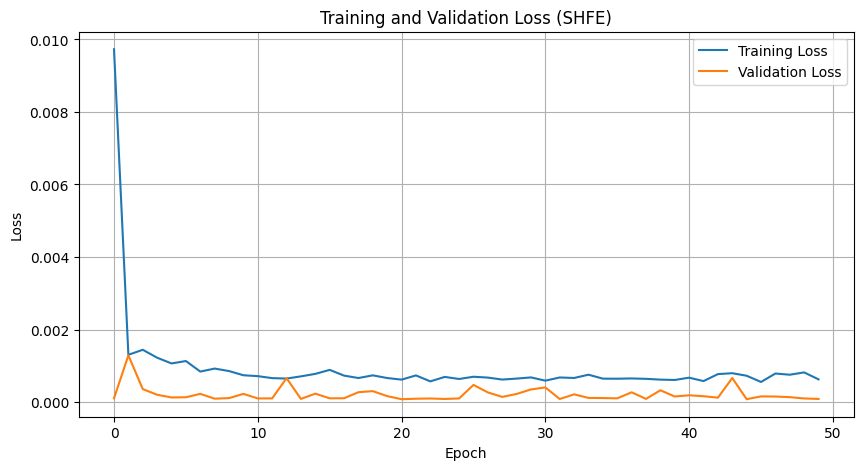

Hyperparameters used for SHFE model:
Units: 100
Learning Rate: 0.001
Batch Size: 16
Epochs: 50


In [31]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (SHFE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


print("Hyperparameters used for SHFE model:")
print(f"Units: {best_params['units']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Epochs: {best_params['epochs']}")

Awal Training (Epoch 0-5):

* Training loss turun drastis dari sekitar 0.01 ke 0.002.
* Validation loss juga cepat turun dan kemudian stabil mendekati 0.001.
Stabilitas (Epoch 5-50):

* Training loss berfluktuasi sedikit tapi tetap rendah di sekitar 0.001-0.002.
* Validation loss cenderung lebih rendah dari training loss dan stabil, mendekati 0 di beberapa epoch.

* Tidak ada tanda overfitting yang jelas. Biasanya overfitting terlihat jika validation loss meningkat sementara training loss terus menurun, tapi di sini validation loss tetap stabil.
* Malah, validation loss lebih rendah dari training loss — bisa jadi model masih bisa dituning lebih baik, atau datanya memiliki sedikit noise.

#LME

##lme gridsearch parameter

In [45]:
import pandas as pd
import time

# Variasi hyperparameter sederhana (dibuat sedikit agar cepat)
units_options = [50, 100]
learning_rates = [0.001, 0.01]
batch_sizes = [16]
epochs_options = [50]

# Inisialisasi hasil terbaik
best_mse = float('inf')
best_params = {}
results = []  # Untuk menyimpan hasil evaluasi

print("Memulai Grid Search (estimasi waktu: < 1 menit)...")

# Mulai hitung waktu
start_time = time.time()

# Grid Search manual
for units in units_options:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                # Bangun model GRU
                model = build_gru(units=units, learning_rate=lr)

                # Latih model (verbose=0 agar output ringkas)
                history = model.fit(
                    X_train_shfe, y_train_shfe,
                    validation_data=(X_val_shfe, y_val_shfe),
                    epochs=epochs, batch_size=batch_size, verbose=0
                )

                # Evaluasi model
                mse = model.evaluate(X_val_shfe, y_val_shfe, verbose=0)

                # Simpan hasil evaluasi
                results.append([units, lr, batch_size, epochs, mse])

                # Tampilkan hasil kombinasi dan MSE
                print(f"Units: {units}, LR: {lr}, Batch Size: {batch_size}, Epochs: {epochs} -> MSE: {mse:.4f}")

                # Simpan hyperparameter terbaik
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'units': units, 'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}

    # Cek waktu, hentikan jika lebih dari 1 menit
    if time.time() - start_time > 60:
        print("\nWaktu komputasi mencapai 1 menit, menghentikan proses...")
        break

# Konversi hasil ke tabel pandas
results_df = pd.DataFrame(results, columns=['Units', 'Learning Rate', 'Batch Size', 'Epochs', 'MSE'])
print("\nHasil Grid Search:")
print(results_df)

# Menampilkan hyperparameter terbaik
print("\nBest Hyperparameters:", best_params)
print("Best MSE:", best_mse)


Memulai Grid Search (estimasi waktu: < 1 menit)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Units: 50, LR: 0.001, Batch Size: 16, Epochs: 50 -> MSE: 0.0001
Units: 50, LR: 0.01, Batch Size: 16, Epochs: 50 -> MSE: 0.0001

Waktu komputasi mencapai 1 menit, menghentikan proses...

Hasil Grid Search:
   Units  Learning Rate  Batch Size  Epochs       MSE
0     50          0.001          16      50  0.000081
1     50          0.010          16      50  0.000144

Best Hyperparameters: {'units': 50, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 50}
Best MSE: 8.067064482020214e-05


##lme

In [ ]:
# === 7. GRID SEARCH MANUAL ===
units_options = [50, 100, 150]
learning_rates = [0.001, 0.01]
batch_sizes = [16, 32]
epochs_options = [50, 100]

best_mse = float('inf')
best_params = {}

for units in units_options:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                model = build_gru(units=units, learning_rate=lr)
                history = model.fit(X_train_lme, y_train_lme, validation_data=(X_val_lme, y_val_lme), epochs=epochs, batch_size=batch_size, verbose=0)
                mse = model.evaluate(X_val_lme, y_val_lme, verbose=0)
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'units': units, 'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}

print("\nBest Hyperparameters:", best_params)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Best Hyperparameters: {'units': 50, 'learning_rate': 0.01, 'batch_size': 32, 'epochs': 100}


## TRAIN FINAL MODEL LME (1 OUTPUT)

In [46]:
# ===  TRAIN FINAL MODEL ===
# Ambil hyperparameter untuk membangun model
best_model = build_gru(units=best_params['units'], learning_rate=best_params['learning_rate'])

# Latih model menggunakan batch_size dan epochs
best_model.fit(
    X_train_lme, y_train_lme,
    validation_data=(X_val_lme, y_val_lme),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0600 - val_loss: 1.1050e-04
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - val_loss: 4.6533e-05
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022 - val_loss: 1.9639e-04
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 3.2717e-04
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016 - val_loss: 1.7875e-04
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0020 - val_loss: 1.5219e-05
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 3.1540e-05
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 1.2826e-05
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 1.1747e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 2.2197e-05
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 1.0197e-05
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s

## PREDICTION ===

In [52]:
# === 8. PREDICTION ===
y_pred = best_model.predict(X_test_lme)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## Denormalisasi

In [77]:
# Inverse scaling hasil prediksi
y_test_inv_lme= scaler_lme.inverse_transform(y_test_lme.reshape(-1, 1))
y_pred_inv_lme = scaler_lme.inverse_transform(y_pred)

##Evaluasi Model Prediksi (Data test vs Data Aktual)

In [78]:
y_test_inv_lme = np.nan_to_num(y_test_inv, nan=np.nanmean(y_test_inv))
y_pred_inv_lme = np.nan_to_num(y_pred_inv, nan=np.nanmean(y_pred_inv))

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.17517191050250042


# === 10. VISUALISASI ===



##lme

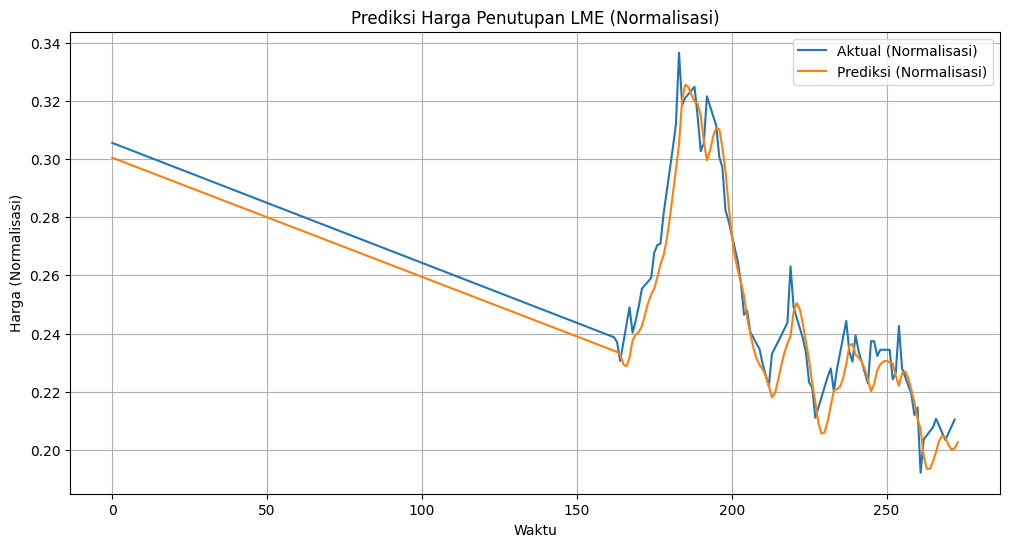

In [79]:
# Visualisasi data prediksi SEBELUM denormalisasi untuk LME
plt.figure(figsize=(12, 6))
plt.plot(y_test_lme, label='Aktual (Normalisasi)')
plt.plot(y_pred, label='Prediksi (Normalisasi)')
plt.title('Prediksi Harga Penutupan LME (Normalisasi)')
plt.xlabel('Waktu')
plt.ylabel('Harga (Normalisasi)')
plt.legend()
plt.grid(True)
plt.show()


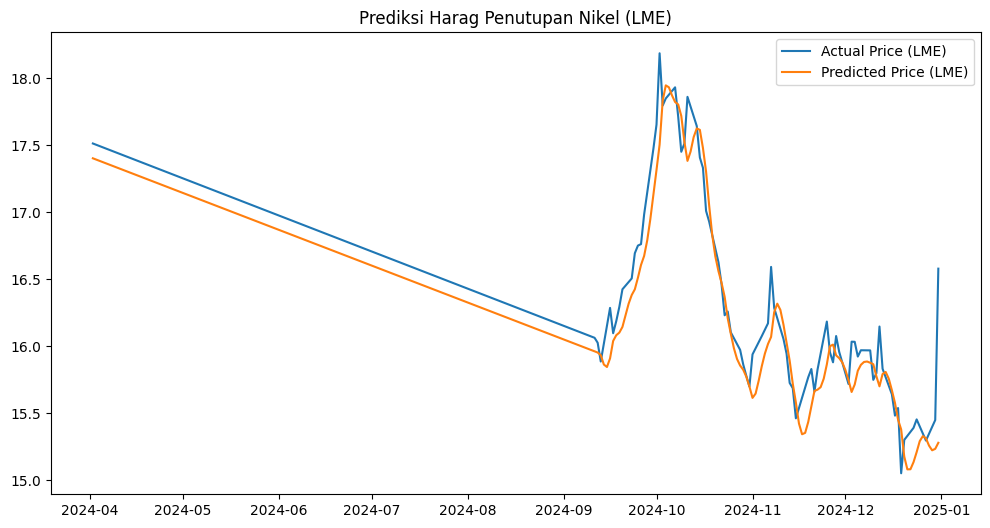

In [80]:
# === 10. VISUALISASI ===
plt.figure(figsize=(12, 6))
plt.plot(shfe_df.index[-len(y_test_lme):], y_test_inv, label='Actual Price (LME)')
plt.plot(shfe_df.index[-len(y_test_lme):], y_pred_inv, label='Predicted Price (LME)')
plt.title('Prediksi Harag Penutupan Nikel (LME)')
plt.legend()
plt.show()

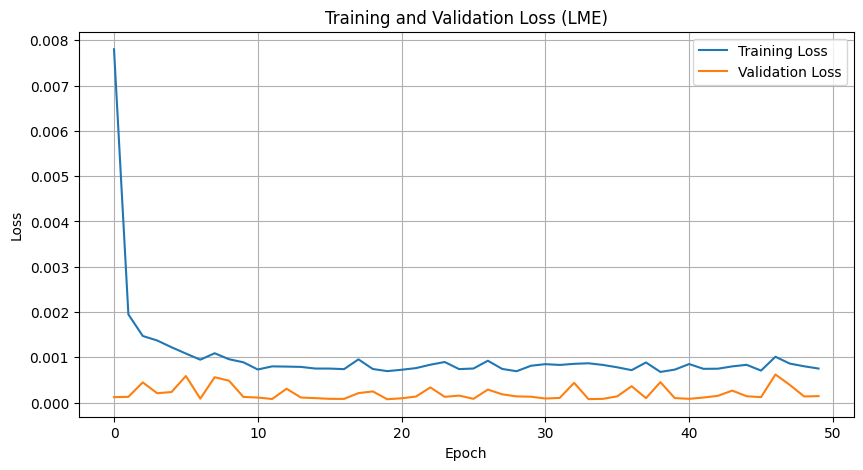

Hyperparameters used for LME model:
Units: 50
Learning Rate: 0.001
Batch Size: 16
Epochs: 50


In [81]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (LME)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


print("Hyperparameters used for LME model:")
print(f"Units: {best_params['units']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Epochs: {best_params['epochs']}")

#BANDINGKAN 2 BURSA

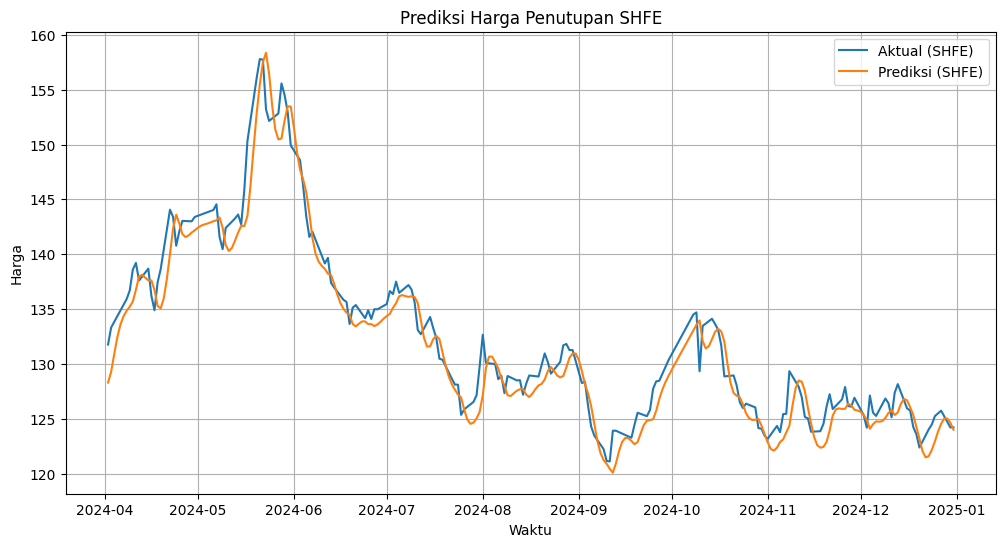

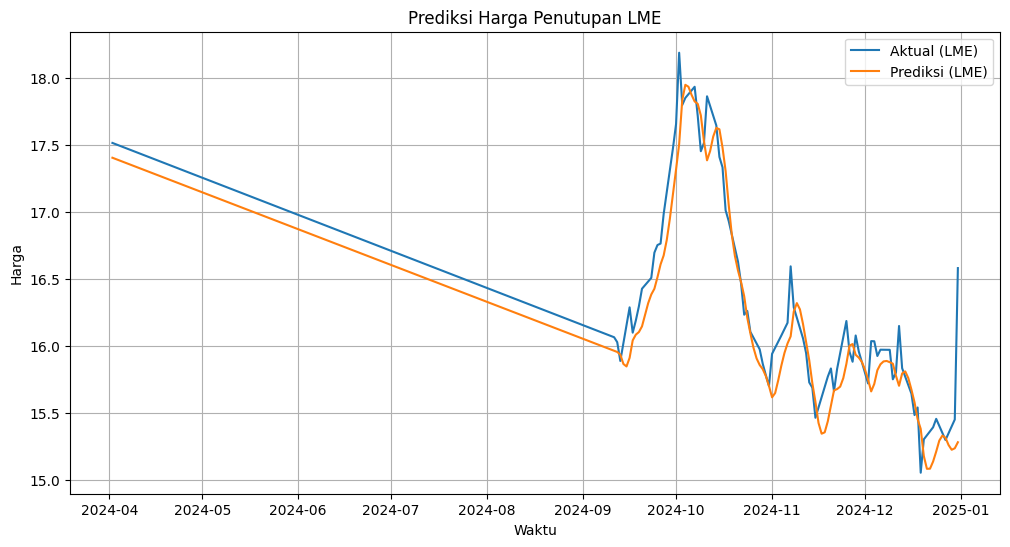

In [96]:
# prompt: Gabungkan visualisasi prediksi SHFE dan LME setelah denormalisasi DENGAN DUA GRAFIK BERBEDA

import matplotlib.pyplot as plt

# ... (your existing code) ...

# Visualisasi prediksi SHFE setelah denormalisasi
plt.figure(figsize=(12, 6))
plt.plot(shfe_df.index[-len(y_test_shfe):], y_test_inv, label='Aktual (SHFE)')
plt.plot(shfe_df.index[-len(y_test_shfe):], y_pred_inv, label='Prediksi (SHFE)')
plt.title('Prediksi Harga Penutupan SHFE')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi prediksi LME setelah denormalisasi
plt.figure(figsize=(12, 6))
plt.plot(lme_df.index[-len(y_test_lme):], y_test_inv_lme, label='Aktual (LME)') # Use y_test_inv_lme and lme_df index
plt.plot(lme_df.index[-len(y_test_lme):], y_pred_inv_lme, label='Prediksi (LME)') # Use y_pred_inv_lme and lme_df index
plt.title('Prediksi Harga Penutupan LME')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


#PREDIKSI HARGA NIKEL KEDUA BURSA UNTUK 1 BULAN KEDEPAN

## shfe 1 bulan

In [116]:
print("Tanggal terakhir data aktual:", lme_df.index[-1])


Tanggal terakhir data aktual: 2024-12-31 00:00:00


In [117]:
print("Tanggal awal prediksi:", future_dates_lme[0])

Tanggal awal prediksi: 2025-01-01 00:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

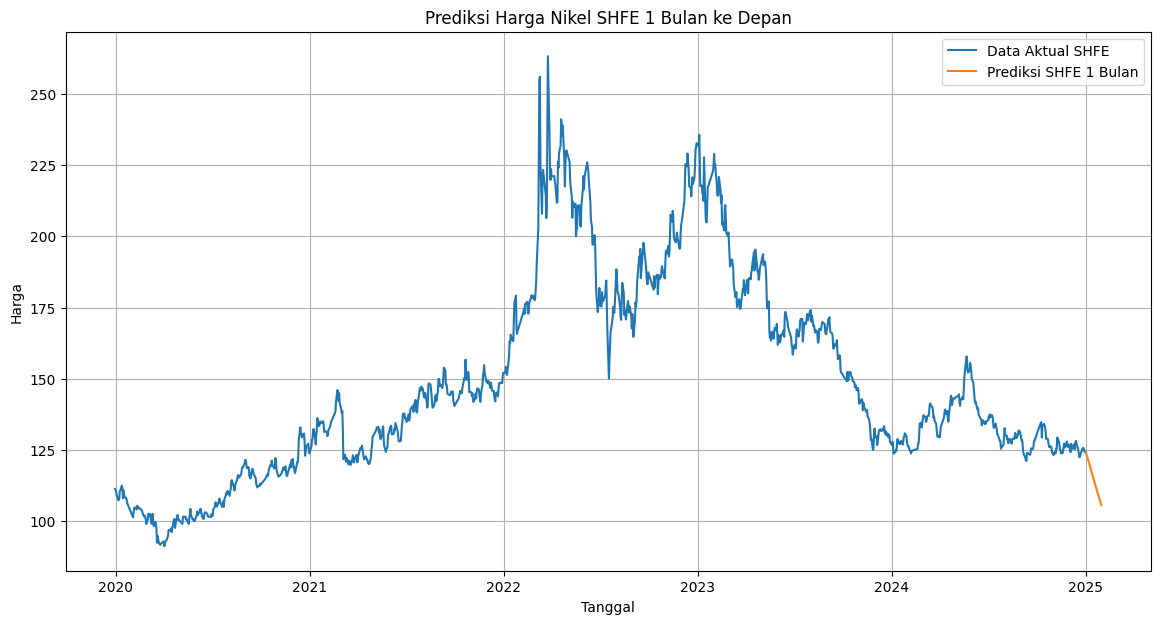

In [100]:
# Fungsi untuk membuat prediksi 1 bulan ke depan
def predict_future(model, last_data, days_to_predict=30):
    predictions = []
    current_sequence = last_data.copy()
    for _ in range(days_to_predict):
        prediction = model.predict(np.array([current_sequence]))[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(predictions)

# Prediksi SHFE
last_sequence_shfe = X_test_shfe[-1]
future_predictions_shfe = predict_future(best_model, last_sequence_shfe)
future_predictions_shfe_inv = scaler_shfe.inverse_transform(future_predictions_shfe.reshape(-1, 1))

# Memperpanjang indeks untuk visualisasi prediksi
future_dates_shfe = pd.date_range(start=shfe_df.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions_shfe))

# Visualisasi prediksi SHFE
plt.figure(figsize=(14, 7))
plt.plot(shfe_df.index, scaler_shfe.inverse_transform(shfe_values.reshape(-1, 1)), label='Data Aktual SHFE')
plt.plot(future_dates_shfe, future_predictions_shfe_inv, label='Prediksi SHFE 1 Bulan')
plt.title('Prediksi Harga Nikel SHFE 1 Bulan ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

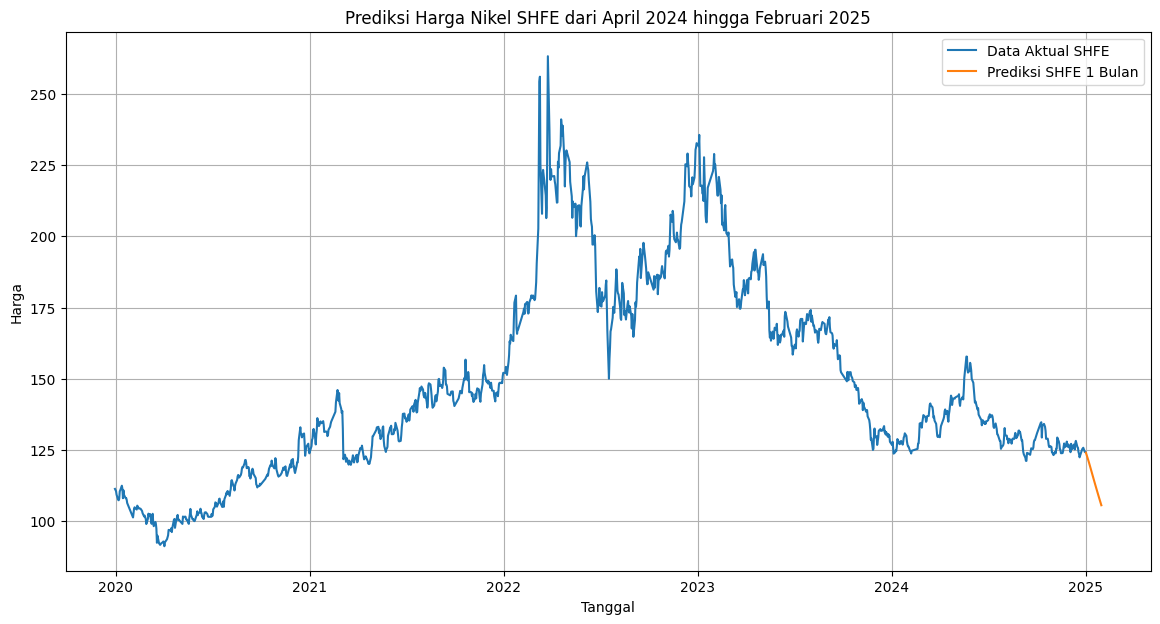

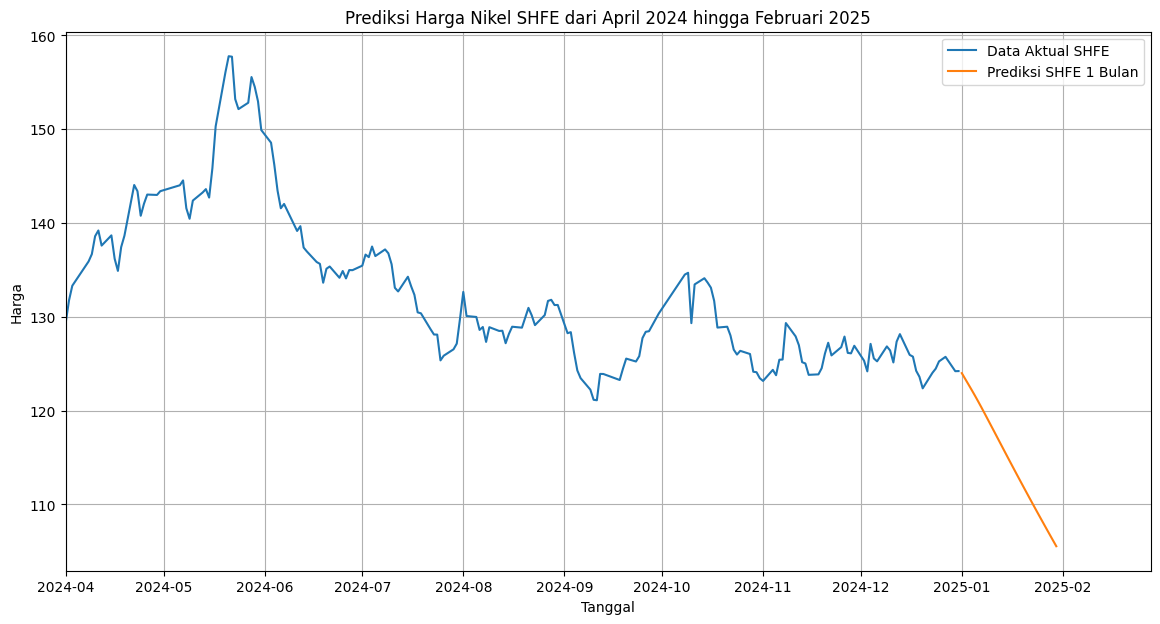

In [122]:
# Fungsi untuk membuat prediksi 1 bulan ke depan
def predict_future(model, last_data, days_to_predict=30):
    predictions = []
    current_sequence = last_data.copy()
    for _ in range(days_to_predict):
        prediction = model.predict(np.array([current_sequence]))[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(predictions)

# Prediksi SHFE
last_sequence_shfe = X_test_shfe[-1]
future_predictions_shfe = predict_future(best_model, last_sequence_shfe)
future_predictions_shfe_inv = scaler_shfe.inverse_transform(future_predictions_shfe.reshape(-1, 1))

# Memperpanjang indeks untuk visualisasi prediksi
future_dates_shfe = pd.date_range(start=shfe_df.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions_shfe))


# Menggabungkan data aktual dan prediksi untuk visualisasi tanpa gap
combined_dates_shfe = pd.date_range(start=shfe_df.index[0], end=future_dates_shfe[-1])
combined_values_shfe = np.concatenate([
    scaler_shfe.inverse_transform(shfe_df['Terakhir'].values.reshape(-1, 1)).flatten(),
    future_predictions_shfe_inv.flatten()
])

# Visualisasi gabungan
plt.figure(figsize=(14, 7))
plt.plot(combined_dates_shfe[:len(shfe_df)], scaler_shfe.inverse_transform(shfe_df['Terakhir'].values.reshape(-1, 1)), label='Data Aktual SHFE')
plt.plot(combined_dates_shfe[len(shfe_df):], future_predictions_shfe_inv, label='Prediksi SHFE 1 Bulan')
plt.title('Prediksi Harga Nikel SHFE dari April 2024 hingga Februari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

# Menggabungkan data aktual dan prediksi untuk visualisasi tanpa gap
combined_dates_shfe = pd.date_range(start=shfe_df.index[0], end=future_dates_shfe[-1])
combined_values_shfe = np.concatenate([
    scaler_shfe.inverse_transform(shfe_df['Terakhir'].values.reshape(-1, 1)).flatten(),
    future_predictions_shfe_inv.flatten()
])

# Filter data untuk rentang waktu tertentu
start_date = '2024-04-01'
end_date = '2025-02-28'
filtered_shfe_df = shfe_df.loc[(shfe_df.index >= start_date) & (shfe_df.index <= end_date)]

# Visualisasi prediksi SHFE
plt.figure(figsize=(14, 7))
plt.plot(filtered_shfe_df.index, scaler_shfe.inverse_transform(filtered_shfe_df['Terakhir'].values.reshape(-1, 1)), label='Data Aktual SHFE')
plt.plot(future_dates_shfe, future_predictions_shfe_inv, label='Prediksi SHFE 1 Bulan')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.title('Prediksi Harga Nikel SHFE dari April 2024 hingga Februari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

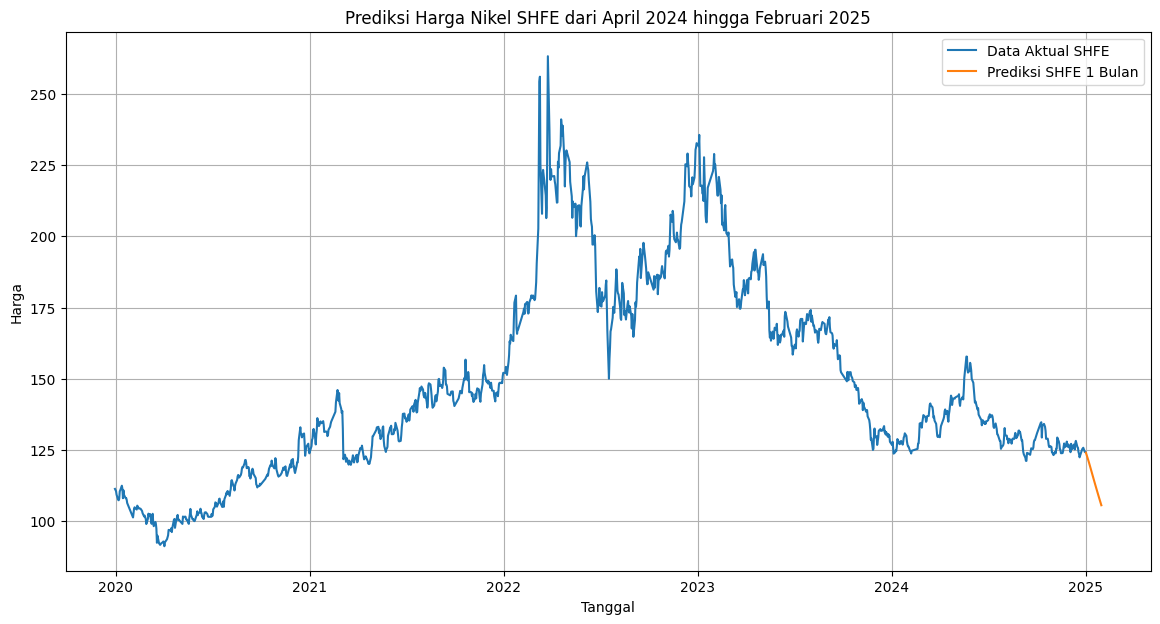

In [120]:
# Fungsi untuk membuat prediksi 1 bulan ke depan
def predict_future(model, last_data, days_to_predict=30):
    predictions = []
    current_sequence = last_data.copy()
    for _ in range(days_to_predict):
        prediction = model.predict(np.array([current_sequence]))[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(predictions)

# Prediksi SHFE
last_sequence_shfe = X_test_shfe[-1]
future_predictions_shfe = predict_future(best_model, last_sequence_shfe)
future_predictions_shfe_inv = scaler_shfe.inverse_transform(future_predictions_shfe.reshape(-1, 1))

# Memperpanjang indeks untuk visualisasi prediksi
future_dates_shfe = pd.date_range(start=shfe_df.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions_shfe))

# Menggabungkan data aktual dan prediksi untuk visualisasi tanpa gap
combined_dates_shfe = pd.date_range(start=shfe_df.index[0], end=future_dates_shfe[-1])
combined_values_shfe = np.concatenate([
    scaler_shfe.inverse_transform(shfe_df['Terakhir'].values.reshape(-1, 1)).flatten(),
    future_predictions_shfe_inv.flatten()
])

# Visualisasi gabungan
plt.figure(figsize=(14, 7))
plt.plot(combined_dates_shfe[:len(shfe_df)], scaler_shfe.inverse_transform(shfe_df['Terakhir'].values.reshape(-1, 1)), label='Data Aktual SHFE')
plt.plot(combined_dates_shfe[len(shfe_df):], future_predictions_shfe_inv, label='Prediksi SHFE 1 Bulan')
plt.title('Prediksi Harga Nikel SHFE dari April 2024 hingga Februari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


## lme 1 bulan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

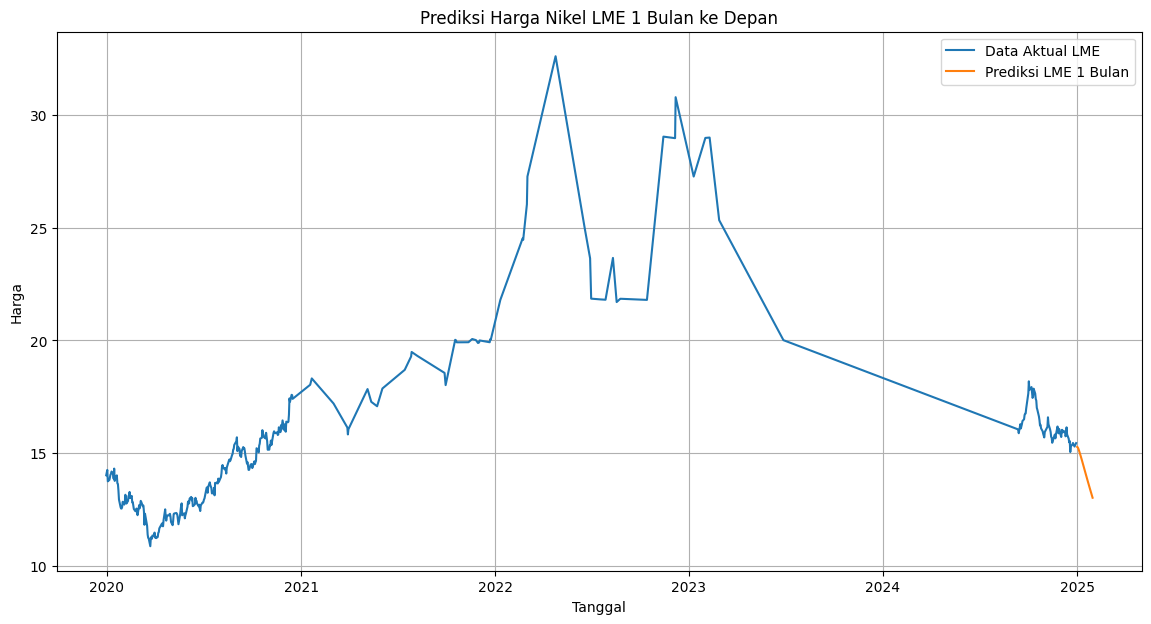

In [101]:
# Fungsi untuk membuat prediksi 1 bulan ke depan
def predict_future(model, last_data, days_to_predict=30):
    predictions = []
    current_sequence = last_data.copy()
    for _ in range(days_to_predict):
        prediction = model.predict(np.array([current_sequence]))[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(predictions)


# Prediksi LME
last_sequence_lme = X_test_lme[-1]
future_predictions_lme = predict_future(best_model, last_sequence_lme)
future_predictions_lme_inv = scaler_lme.inverse_transform(future_predictions_lme.reshape(-1, 1))

# Memperpanjang indeks untuk visualisasi prediksi
future_dates_lme = pd.date_range(start=lme_df.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions_lme))

# Visualisasi prediksi LME
plt.figure(figsize=(14, 7))
plt.plot(lme_df.index, scaler_lme.inverse_transform(lme_values.reshape(-1, 1)), label='Data Aktual LME')
plt.plot(future_dates_lme, future_predictions_lme_inv, label='Prediksi LME 1 Bulan')
plt.title('Prediksi Harga Nikel LME 1 Bulan ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

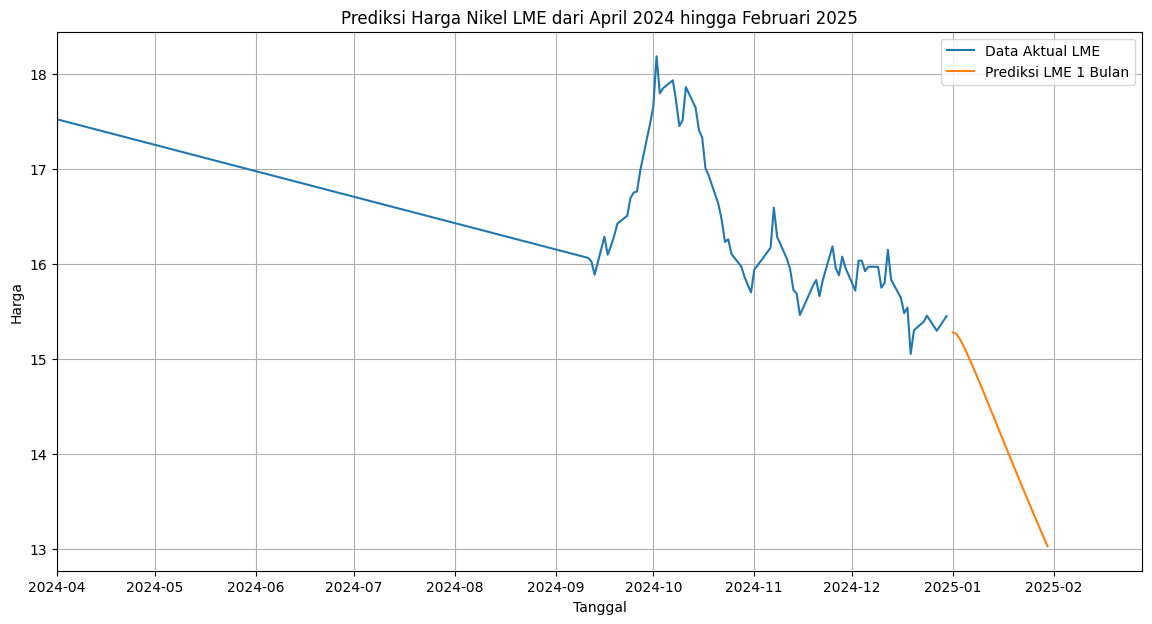

In [124]:
# Fungsi untuk membuat prediksi 1 bulan ke depan
def predict_future(model, last_data, days_to_predict=30):
    predictions = []
    current_sequence = last_data.copy()
    for _ in range(days_to_predict):
        prediction = model.predict(np.array([current_sequence]))[0, 0]
        predictions.append(prediction)
        current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(predictions)

# Prediksi LME
last_sequence_lme = X_test_lme[-1]
future_predictions_lme = predict_future(best_model, last_sequence_lme)
future_predictions_lme_inv = scaler_lme.inverse_transform(future_predictions_lme.reshape(-1, 1))

# Memperpanjang indeks untuk visualisasi prediksi
future_dates_lme = pd.date_range(start=lme_df.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions_lme))


# Filter data untuk rentang waktu tertentu
start_date = '2024-04-01'
end_date = '2025-02-28'
filtered_lme_df = lme_df.loc[(lme_df.index >= start_date) & (lme_df.index <= end_date)]

# Visualisasi prediksi LME
plt.figure(figsize=(14, 7))
plt.plot(filtered_lme_df.index, scaler_lme.inverse_transform(filtered_lme_df['Terakhir'].values.reshape(-1, 1)), label='Data Aktual LME')
plt.plot(future_dates_lme, future_predictions_lme_inv, label='Prediksi LME 1 Bulan')
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))
plt.title('Prediksi Harga Nikel LME dari April 2024 hingga Februari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


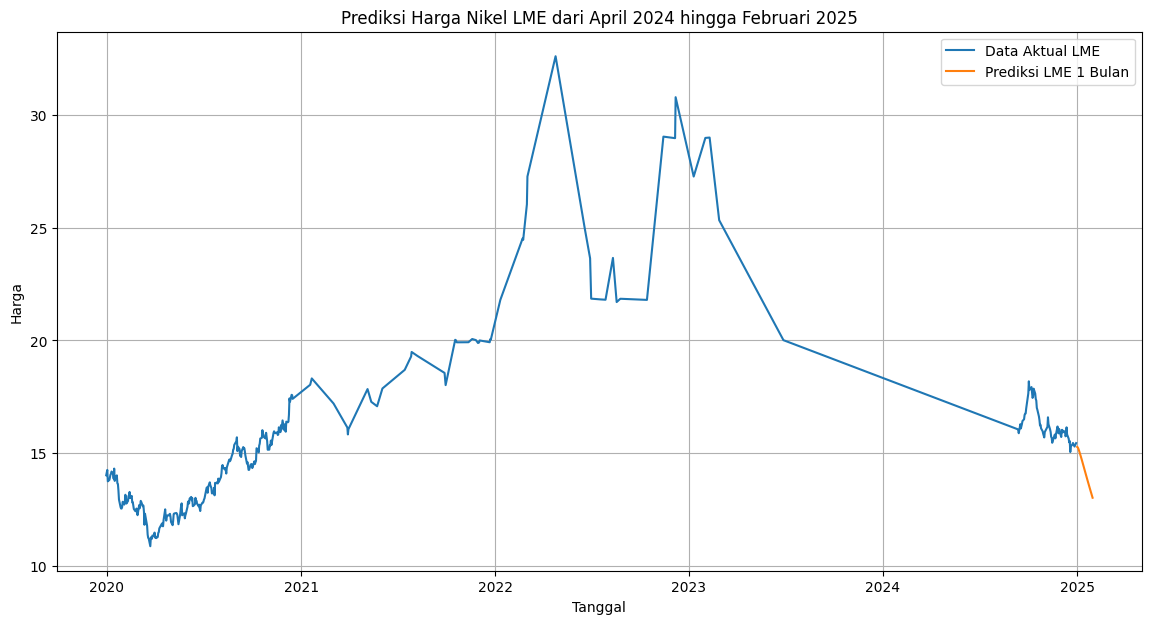

In [119]:
# Menggabungkan data aktual dan prediksi untuk visualisasi tanpa gap
combined_dates_lme = pd.date_range(start=lme_df.index[0], end=future_dates_lme[-1])
combined_values_lme = np.concatenate([
    scaler_lme.inverse_transform(lme_df['Terakhir'].values.reshape(-1, 1)).flatten(),
    future_predictions_lme_inv.flatten()
])

# Visualisasi gabungan
plt.figure(figsize=(14, 7))
plt.plot(combined_dates_lme[:len(lme_df)], scaler_lme.inverse_transform(lme_df['Terakhir'].values.reshape(-1, 1)), label='Data Aktual LME')
plt.plot(combined_dates_lme[len(lme_df):], future_predictions_lme_inv, label='Prediksi LME 1 Bulan')
plt.title('Prediksi Harga Nikel LME dari April 2024 hingga Februari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


#TABEL KOMPARASI


Tabel Data Aktual vs Prediksi (LME)
               Aktual   Prediksi
Tanggal                         
2024-04-02  17.513918  17.403355
2024-04-03  17.504968  17.394468
2024-04-04  17.496018  17.385582
2024-04-05  17.487068  17.376696
2024-04-06  17.478118  17.367809
...               ...        ...
2024-12-27  15.297000  15.313686
2024-12-28  15.348000  15.259304
2024-12-29  15.399000  15.224384
2024-12-30  15.450000  15.235358
2024-12-31  16.579855  15.280451

[274 rows x 2 columns]

Tabel Data Aktual vs Prediksi (SHFE)
             Aktual    Prediksi
Tanggal                        
2024-04-02  131.770  128.298996
2024-04-03  133.320  129.285645
2024-04-04  133.838  130.907654
2024-04-05  134.356  132.440765
2024-04-06  134.874  133.587982
...             ...         ...
2024-12-27  125.740  124.542778
2024-12-28  125.230  125.014984
2024-12-29  124.720  125.025894
2024-12-30  124.210  124.628189
2024-12-31  124.220  124.002441

[274 rows x 2 columns]


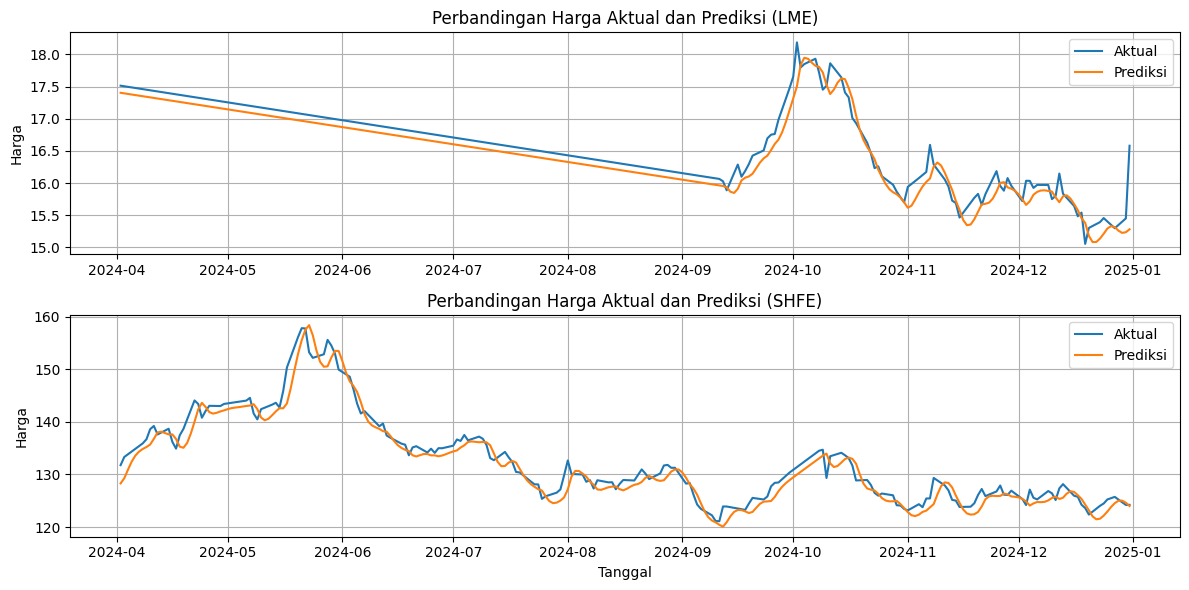

In [126]:
# prompt: tampilkan tabel data aktual vs prediksi untuk lme dan shfe, pake bahasa indoensia

import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test_inv_lme, y_pred_inv_lme, y_test_inv, and y_pred_inv are defined
# and contain the denormalized actual and predicted values for LME and SHFE.
# Also assuming lme_df and shfe_df have a DateTimeIndex

# Create DataFrames for better visualization
lme_data = pd.DataFrame({'Aktual': y_test_inv_lme.flatten(), 'Prediksi': y_pred_inv_lme.flatten()}, index=lme_df.index[-len(y_test_inv_lme):])
shfe_data = pd.DataFrame({'Aktual': y_test_inv.flatten(), 'Prediksi': y_pred_inv.flatten()}, index=shfe_df.index[-len(y_test_inv):])


# Display the tables
print("Tabel Data Aktual vs Prediksi (LME)")
print(lme_data)

print("\nTabel Data Aktual vs Prediksi (SHFE)")
print(shfe_data)


# Plotting (Optional: If you want a visual comparison)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(lme_data.index, lme_data['Aktual'], label='Aktual')
plt.plot(lme_data.index, lme_data['Prediksi'], label='Prediksi')
plt.title('Perbandingan Harga Aktual dan Prediksi (LME)')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(shfe_data.index, shfe_data['Aktual'], label='Aktual')
plt.plot(shfe_data.index, shfe_data['Prediksi'], label='Prediksi')
plt.title('Perbandingan Harga Aktual dan Prediksi (SHFE)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)

plt.tight_layout() # to prevent overlapping titles and labels
plt.show()


In [130]:
# prompt: bagaimana dimensi data saat masuk ke model GRU, bahasa indonesia

""""Dimensi data yang masuk ke model GRU dalam kode yang Anda berikan adalah **(jumlah sampel, jumlah langkah waktu, jumlah fitur)**.

Mari kita uraikan:

* **Jumlah Sampel:** Ini adalah jumlah observasi atau data point dalam dataset Anda.  Dalam konteks *time series*, setiap sampel biasanya mewakili satu titik waktu. Variabel `X_train_lme`, `X_val_lme`, dan `X_test_lme`  merepresentasikan data latih, validasi, dan uji yang masing-masing terdiri dari sejumlah sampel.

* **Jumlah Langkah Waktu (Time Steps):** Ini adalah ukuran *lookback window* atau panjang urutan data yang digunakan untuk memprediksi nilai selanjutnya.  Dalam kode Anda, ukuran *lookback window* ini tidak secara eksplisit didefinisikan dalam kode yang Anda berikan, tetapi dibentuk ketika Anda membuat variabel  `X_train_lme`, `X_val_lme`, dan `X_test_lme` sebelum kode yang Anda berikan. Variabel-variabel tersebut sudah dalam bentuk yang siap diproses GRU.

* **Jumlah Fitur:** Ini adalah jumlah variabel atau atribut yang digunakan untuk membuat prediksi.  Dalam kode yang Anda berikan, Anda tampaknya hanya menggunakan satu fitur (harga penutupan), tetapi bisa jadi terdapat fitur lain yang digunakan dalam proses pembentukan variabel `X_train_lme`,  `X_val_lme`, dan `X_test_lme` yang tidak terlihat dalam kode yang diberikan.


Sebagai contoh, jika Anda memiliki data harga harian selama 100 hari, dan menggunakan *lookback window* sebesar 10 hari untuk memprediksi harga hari berikutnya, dengan hanya satu fitur (harga penutupan), maka dimensi data yang masuk ke model GRU akan menjadi **(90, 10, 1)**. 90 adalah jumlah sampel karena butuh 10 hari sebelumnya untuk memprediksi hari berikutnya.


Perhatikan bahwa dimensi input GRU harus sesuai dengan cara Anda memproses data sebelum memasukannya ke model GRU (variabel `X_train_lme`, `X_val_lme`, dan `X_test_lme`). Pastikan cara Anda menyiapkan data sesuai dengan kebutuhan GRU.
"""

'"Dimensi data yang masuk ke model GRU dalam kode yang Anda berikan adalah **(jumlah sampel, jumlah langkah waktu, jumlah fitur)**.\n\nMari kita uraikan:\n\n* **Jumlah Sampel:** Ini adalah jumlah observasi atau data point dalam dataset Anda.  Dalam konteks *time series*, setiap sampel biasanya mewakili satu titik waktu. Variabel `X_train_lme`, `X_val_lme`, dan `X_test_lme`  merepresentasikan data latih, validasi, dan uji yang masing-masing terdiri dari sejumlah sampel.\n\n* **Jumlah Langkah Waktu (Time Steps):** Ini adalah ukuran *lookback window* atau panjang urutan data yang digunakan untuk memprediksi nilai selanjutnya.  Dalam kode Anda, ukuran *lookback window* ini tidak secara eksplisit didefinisikan dalam kode yang Anda berikan, tetapi dibentuk ketika Anda membuat variabel  `X_train_lme`, `X_val_lme`, dan `X_test_lme` sebelum kode yang Anda berikan. Variabel-variabel tersebut sudah dalam bentuk yang siap diproses GRU.\n\n* **Jumlah Fitur:** Ini adalah jumlah variabel atau atribut